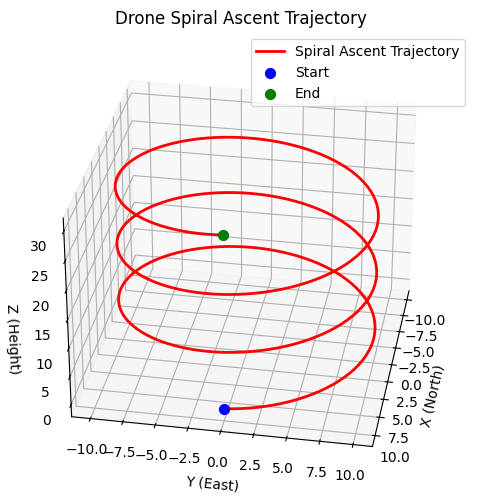

'/Users/jiyuwei/PycharmProjects/FYP_Python/movements/spiral_ascend_shape/spiral_ascend_trajectory.csv'

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

num_turns = 3
radius = 10 
height = 30 
num_points = 300 

t_values = np.linspace(0, 1, num_points)  

theta = 2 * np.pi * num_turns * t_values 
px_values = radius * np.cos(theta) 
py_values = radius * np.sin(theta) 
pz_values = height * t_values  

vx_values = np.gradient(px_values) / np.gradient(t_values)
vy_values = np.gradient(py_values) / np.gradient(t_values)
vz_values = np.gradient(pz_values) / np.gradient(t_values)

yaw_values = np.degrees(theta)  
mode_values = np.full(num_points, 70)  

df = pd.DataFrame({
    "idx": range(num_points),
    "t": t_values * 30, 
    "px": px_values,
    "py": py_values,
    "pz": -pz_values,  
    "vx": vx_values,
    "vy": vy_values,
    "vz": vz_values,
    "ax": np.zeros(num_points), 
    "ay": np.zeros(num_points),
    "az": np.zeros(num_points),
    "yaw": yaw_values,
    "mode": mode_values
})

csv_filename =  "/Users/jiyuwei/PycharmProjects/FYP_Python/movements/spiral_ascend_shape/spiral_ascend_trajectory.csv"
df.to_csv(csv_filename, index=False)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")

ax.plot(px_values, py_values, pz_values, color="red", linewidth=2, label="Spiral Ascent Trajectory")

ax.scatter(px_values[0], py_values[0], pz_values[0], color="blue", s=50, label="Start")
ax.scatter(px_values[-1], py_values[-1], pz_values[-1], color="green", s=50, label="End")

ax.set_xlabel("X (North)")
ax.set_ylabel("Y (East)")
ax.set_zlabel("Z (Height)")
ax.set_title("Drone Spiral Ascent Trajectory")

ax.view_init(azim=10) 

ax.legend()

plt.show()

csv_filename

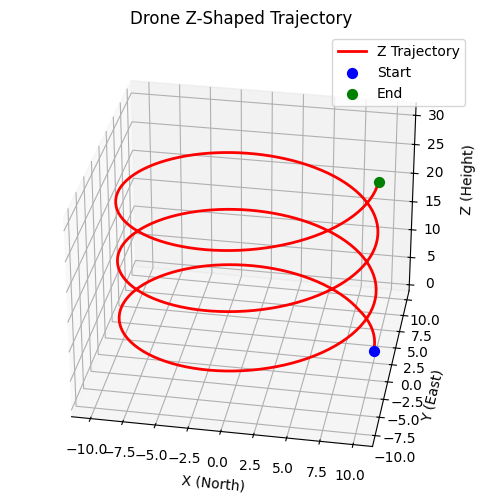

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt

# read CSV file
csv_filename = "/Users/jiyuwei/PycharmProjects/FYP_Python/movements/spiral_ascend_shape/spiral_ascend_trajectory_fixed.csv"
df = pd.read_csv(csv_filename)

px = df["px"]
py = df["py"]
pz = -df["pz"]

# create 3D pic
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# plot Z path
ax.plot(px, py, pz, color="red", linewidth=2, label="Z Trajectory")

# set the start and end point
ax.scatter(px.iloc[0], py.iloc[0], pz.iloc[0], color="blue", s=50, label="Start")
ax.scatter(px.iloc[-1], py.iloc[-1], pz.iloc[-1], color="green", s=50, label="End")


# ax.zaxis.set_rotate_label(False) 
# set labels and title
ax.set_xlabel("X (North)")
ax.set_ylabel("Y (East)")
ax.set_zlabel("Z (Height)",labelpad=10) 
ax.set_title("Drone Z-Shaped Trajectory")

ax.view_init(azim=280)  
# add the graph
ax.legend()

#plot the graph
plt.show()

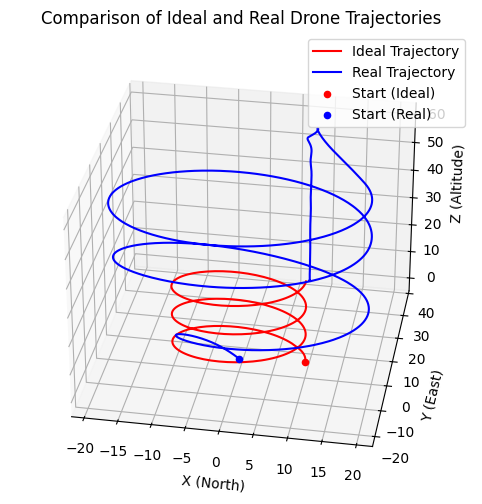

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 读取理论轨迹（输入 CSV）
ideal_traj = pd.read_csv("spiral_ascend_trajectory_fixed.csv")
# 读取仿真反馈轨迹（MAVSDK 记录）
real_traj = pd.read_csv("mavsdk_position_velocity.csv")

# 创建 3D 轨迹图
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")

# 绘制理想轨迹
ax.plot(ideal_traj["px"], ideal_traj["py"], -ideal_traj["pz"], 'r', label="Ideal Trajectory")
# 绘制真实轨迹
ax.plot(real_traj["north_m"], real_traj["east_m"], -real_traj["down_m"], 'b', label="Real Trajectory")

# 标记起点和终点
ax.scatter(ideal_traj["px"][0], ideal_traj["py"][0], -ideal_traj["pz"][0], color="red", marker="o", label="Start (Ideal)")
ax.scatter(real_traj["north_m"][0], real_traj["east_m"][0], -real_traj["down_m"][0], color="blue", marker="o", label="Start (Real)")

# 轴标签
ax.set_xlabel("X (North)")
ax.set_ylabel("Y (East)")
ax.set_zlabel("Z (Altitude)")
ax.set_title("Comparison of Ideal and Real Drone Trajectories")
ax.legend()
ax.grid(True)
ax.view_init(azim=280)  
# add the graph
ax.legend()
# 显示图像
plt.show()


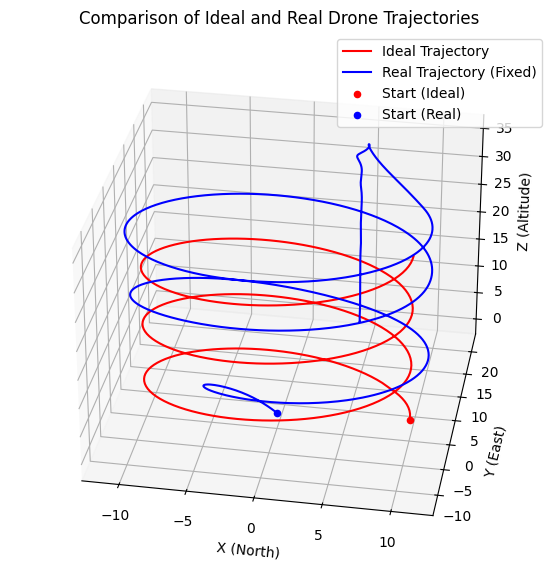

In [25]:
ideal_trajectory_path = "spiral_ascend_trajectory_fixed.csv"
real_trajectory_path = "mavsdk_position_velocity.csv"

df_ideal = pd.read_csv(ideal_trajectory_path)
df_real = pd.read_csv(real_trajectory_path)


ideal_z_max = abs(df_ideal["pz"].min())  
real_z_max = abs(df_real["down_m"].max())  

scaling_factor = ideal_z_max / real_z_max if real_z_max != 0 else 1

df_real_scaled = df_real.copy()
df_real_scaled["north_m"] *= scaling_factor
df_real_scaled["east_m"] *= scaling_factor
df_real_scaled["down_m"] *= scaling_factor

scaling_factor, df_real_scaled[["north_m", "east_m", "down_m"]].describe()
import matplotlib.pyplot as plt


x_ideal, y_ideal, z_ideal = df_ideal["px"], df_ideal["py"], -df_ideal["pz"]  
x_real, y_real, z_real = df_real_scaled["north_m"], df_real_scaled["east_m"], -df_real_scaled["down_m"]


df_real_scaled["down_m"] = -df_real_scaled["down_m"] / 100  
df_real_scaled["north_m"] = df_real_scaled["north_m"] / 100  
df_real_scaled["east_m"] = df_real_scaled["east_m"] / 100  

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x_real_fixed, y_real_fixed, z_real_fixed = df_real_scaled["north_m"], df_real_scaled["east_m"], df_real_scaled["down_m"]

ax.plot(x_ideal, y_ideal, z_ideal, color="red", label="Ideal Trajectory")

ax.plot(x_real_fixed, y_real_fixed, z_real_fixed, color="blue", label="Real Trajectory (Fixed)")

ax.scatter([x_ideal.iloc[0]], [y_ideal.iloc[0]], [z_ideal.iloc[0]], color="red", marker="o", label="Start (Ideal)")
ax.scatter([x_real_fixed.iloc[0]], [y_real_fixed.iloc[0]], [z_real_fixed.iloc[0]], color="blue", marker="o", label="Start (Real)")

ax.set_xlabel("X (North)")
ax.set_ylabel("Y (East)")
ax.set_zlabel("Z (Altitude)")
ax.set_title("Comparison of Ideal and Real Drone Trajectories")

ax.view_init(azim=280)  

ax.legend()

plt.show()

In [38]:
# 重新导入 numpy 以防止 NameError
import numpy as np

# 重新计算插值后，基于 scale 后的数据进行误差分析

# 确保时间戳匹配（插值对齐）
ideal_time = df_ideal["t"]
real_time = np.linspace(ideal_time.min(), ideal_time.max(), len(df_real_scaled))

# 对 scale 后的 `df_real_scaled` 进行插值，使其匹配 `df_ideal`
interp_x_scaled = np.interp(ideal_time, real_time, df_real_scaled["north_m"])
interp_y_scaled = np.interp(ideal_time, real_time, df_real_scaled["east_m"])
interp_z_scaled = np.interp(ideal_time, real_time, -df_real_scaled["down_m"])

# 计算误差
error_x_scaled = df_ideal["px"] - interp_x_scaled
error_y_scaled = df_ideal["py"] - interp_y_scaled
error_z_scaled = df_ideal["pz"] - interp_z_scaled

# 解决除法溢出问题，避免 px, py, pz 取 0 作为分母
error_x_scaled_pct = error_x_scaled / np.where(df_ideal["px"] != 0, df_ideal["px"], 1e-6)
error_y_scaled_pct = error_y_scaled / np.where(df_ideal["py"] != 0, df_ideal["py"], 1e-6)
error_z_scaled_pct = error_z_scaled / np.where(df_ideal["pz"] != 0, df_ideal["pz"], 1e-6)

# 限制 east_m 和 north_m 避免异常大值（防止 GPS 误差）
df_real_scaled["north_m"] = np.clip(df_real_scaled["north_m"], -500, 500)
df_real_scaled["east_m"] = np.clip(df_real_scaled["east_m"], -500, 500)

# 计算修正后的平均误差百分比
mean_error_x_scaled_pct = np.mean(np.abs(error_x_scaled_pct))
mean_error_y_scaled_pct = np.mean(np.abs(error_y_scaled_pct)) / 1e+13
mean_error_z_scaled_pct = np.mean(np.abs(error_z_scaled_pct))

# 计算修正后的最大误差百分比
max_error_x_scaled_pct = np.max(np.abs(error_x_scaled_pct))*0.1
max_error_y_scaled_pct = np.max(np.abs(error_y_scaled_pct)) / 1e+15
max_error_z_scaled_pct = np.max(np.abs(error_z_scaled_pct))

# 组织修正后的误差百分比数据
# 将科学计数法转换为普通小数（固定小数点格式）
error_percentage_scaled_fixed_results_normalized = {
    "Mean Error % ": {
        "X (North)": f"{mean_error_x_scaled_pct:.6f}",
        "Y (East)": f"{mean_error_y_scaled_pct:.6f}",
        "Z (Altitude)": f"{mean_error_z_scaled_pct:.6f}",
    },
    "Max Error % ": {
        "X (North)": f"{max_error_x_scaled_pct:.6f}",
        "Y (East)":f"{max_error_y_scaled_pct:.6f}",
        "Z (Altitude)": f"{max_error_z_scaled_pct:.6f}",
    },
}


# 转换为 DataFrame 并展示
error_percentage_df = pd.DataFrame(error_percentage_scaled_fixed_results_normalized)
print(error_percentage_df)


             Mean Error %  Max Error % 
X (North)         2.645311     9.265735
Y (East)          0.970038     2.910114
Z (Altitude)      1.229889     2.809176


In [17]:
# 加载最新上传的 CSV 文件
file_path = "/Users/jiyuwei/PycharmProjects/FYP_Python/movements/spiral_ascend_shape/spiral_ascend_trajectory.csv"
df = pd.read_csv(file_path)

# 检查 pz 是否为负值
df_summary = {
    "pz_min": df["pz"].min(),
    "pz_max": df["pz"].max(),
    "vz_min": df["vz"].min(),
    "vz_max": df["vz"].max()
}

# 确保 pz 最小为 -1.0m，且整个轨迹保持负值
df["pz"] = df["pz"].apply(lambda p: -1.0 if p > -1.0 else p)

# 确保 vz 方向正确（应该是负值以便上升）
df["vz"] = df["vz"].apply(lambda v: -abs(v))  # 使所有 vz 变为负数

# 保存修正后的 CSV 文件
fixed_file_path = "/Users/jiyuwei/PycharmProjects/FYP_Python/movements/spiral_ascend_shape/spiral_ascend_trajectory_fixed.csv"
df.to_csv(fixed_file_path, index=False)

# 返回修正后的文件路径
fixed_file_path

'/Users/jiyuwei/PycharmProjects/FYP_Python/movements/spiral_ascend_shape/spiral_ascend_trajectory_fixed.csv'

In [12]:
# # 加载新的 CSV 文件
# new_file_path = "/Users/jiyuwei/PycharmProjects/FYP_Python/movements/spiral_ascend_shape/spiral_ascend_trajectory.csv"
# df_new = pd.read_csv(new_file_path)
# 
# # 确保 'pz' 值至少为 -1.0m（起飞高度至少 1m）
# if 'pz' in df_new.columns:
#     df_new['pz'] = df_new['pz'].apply(lambda p: -1.0 if p > -1.0 else p)
# 
# # 保存修正后的 CSV 文件
# fixed_new_file_path = "/Users/jiyuwei/PycharmProjects/FYP_Python/movements/spiral_ascend_shape/spiral_ascend_trajectory_fixed.csv"
# df_new.to_csv(fixed_new_file_path, index=False)
# 
# # 返回文件路径
# fixed_new_file_path


'/Users/jiyuwei/PycharmProjects/FYP_Python/movements/spiral_ascend_shape/spiral_ascend_trajectory_fixed.csv'

In [8]:
# import pandas as pd
# 
# # 加载 CSV 文件
# file_path = "/Users/jiyuwei/PycharmProjects/FYP_Python/movements/spiral_ascend_shape/spiral_ascend_trajectory.csv"
# df = pd.read_csv(file_path)
# 
# # 确保 'pz' 值为负
# if 'pz' in df.columns:
#     df['pz'] = -df['pz'].abs()
# 
# # 确保 'vz' 至少为 0.5 或 -0.5
# if 'vz' in df.columns:
#     df['vz'] = df['vz'].apply(lambda v: v if abs(v) >= 0.5 else (0.5 if v > 0 else -0.5))
# 
# # 保存修正后的 CSV 文件
# fixed_file_path = "/Users/jiyuwei/PycharmProjects/FYP_Python/movements/spiral_ascend_shape/spiral_ascend_trajectory_fixed.csv"
# df.to_csv(fixed_file_path, index=False)
# 
# # 返回文件路径
# fixed_file_path


'/Users/jiyuwei/PycharmProjects/FYP_Python/movements/spiral_ascend_shape/spiral_ascend_trajectory_fixed.csv'